In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
geom = ('anular', 1.0, 1.3, 4)
geom = ('cuboid', 1, 5, 4)
geom = ('cylinder', 1, 4)

mus=(0.36, 0.0259)
S_files = ('./data_Sq/Sqw_vanadium/S_mesh.npy', './data_Sq/Sqw_vanadium/Q_vec.npy', './data_Sq/Sqw_vanadium/omega_vec.npy')

## Test of the MS_sim class

In [4]:
ki=6.28
kf=6.28
theta=np.deg2rad(30)

In [5]:
sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
out = sim.run(N=100000, B=100)

In [6]:
print(sim.Im/sim.Is)

0.0030573474434004684


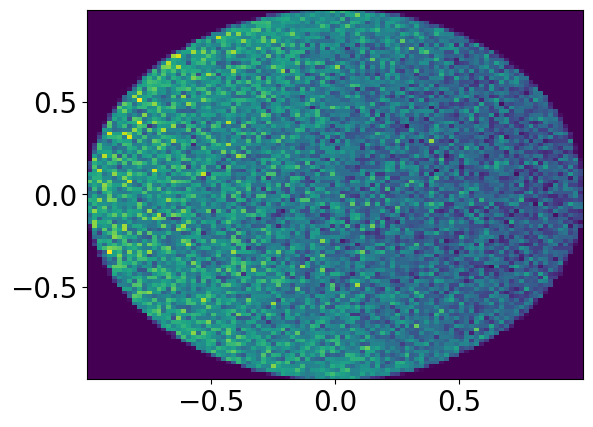

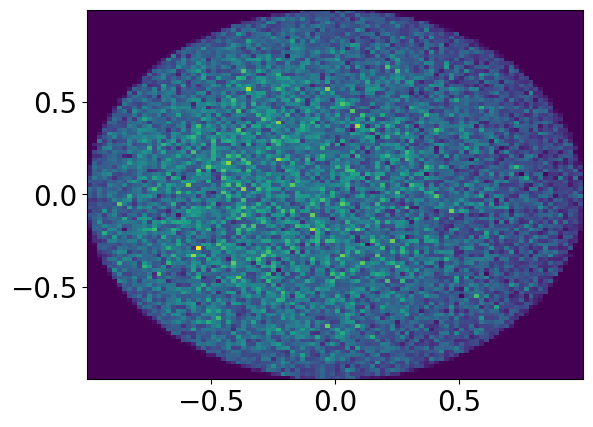

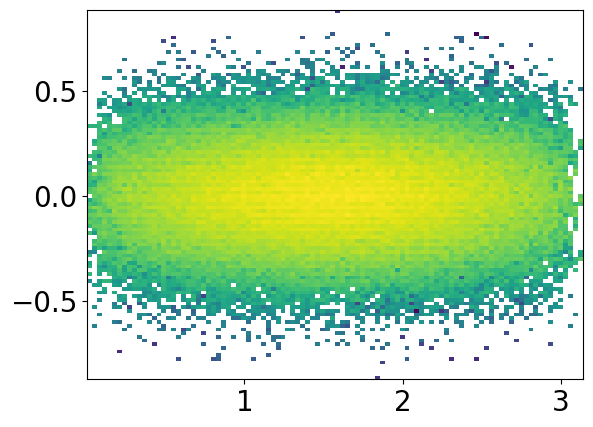

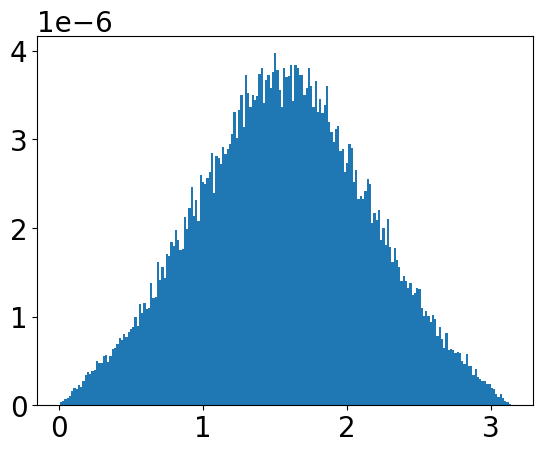

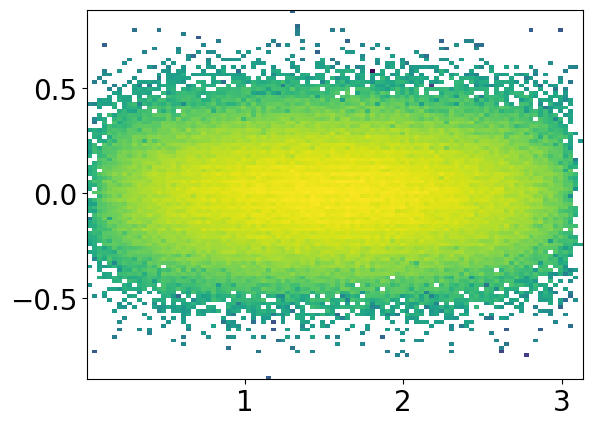

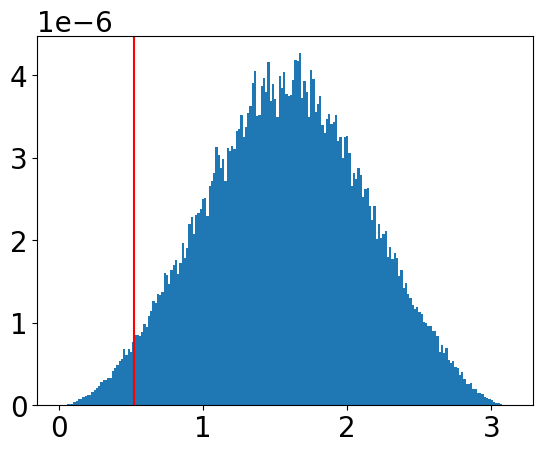

In [7]:
plt.figure()
plt.hist2d(sim.p1[:,0], sim.p1[:,1], bins=100, weights=sim.w1)
plt.figure()
plt.hist2d(sim.p2[:,0], sim.p2[:,1], bins=100, weights=sim.w2)

plt.figure()
plt.hist2d(sim.theta1m, sim.omega1m, weights=sim.wfm, norm=colors.LogNorm(), bins=100);
plt.figure()
plt.hist(sim.theta1m, weights=sim.wfm, bins=200);
plt.figure()
plt.hist2d(sim.theta2m, sim.omega2m, weights=sim.wfm, norm=colors.LogNorm(), bins=100);
plt.figure()
plt.hist(sim.theta2m, weights=sim.wfm, bins=200);
plt.axvline((theta), c='r')

## Loop usage example

In [8]:
######################################
kf = 2*np.pi
omega = np.arange(-30, 30, 1)
Q = 1.5

S_files = ('./data_Sq/Sqw_d-glycerol/S_mesh.npy', './data_Sq/Sqw_d-glycerol/Q_vec.npy', './data_Sq/Sqw_d-glycerol/omega_vec.npy')
mus=(0.37, 0)
######################################

data = GEN_constQgeom('inverse', kf, Q, omega)
data.head()

data1 = GEN_constQgeom('inverse', kf, Q, omega)
data2 = GEN_constQgeom('inverse', kf, Q, omega)
data3 = GEN_constQgeom('inverse', kf, Q, omega)
data4 = GEN_constQgeom('inverse', kf, Q, omega)

In [9]:
geom = ('cylinder', 1.2, 3)

for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, B=40)
    data.loc[i,'Is'] = sim.Is
    data.loc[i,'Im'] = sim.Im

In [10]:
geom = ('cuboid', 1, 4, 4)

for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, B=40)
    data1.loc[i,'Is'] = sim.Is
    data1.loc[i,'Im'] = sim.Im

In [11]:
geom = ('cuboid', .5, 4, 4)

for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, B=40)
    data2.loc[i,'Is'] = sim.Is
    data2.loc[i,'Im'] = sim.Im

In [12]:
geom = ('cuboid', .1, 4, 4)

for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, B=40)
    data3.loc[i,'Is'] = sim.Is
    data3.loc[i,'Im'] = sim.Im

In [13]:
geom = ('cuboid', 1, .4, .4)

for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, B=40)
    data4.loc[i,'Is'] = sim.Is
    data4.loc[i,'Im'] = sim.Im

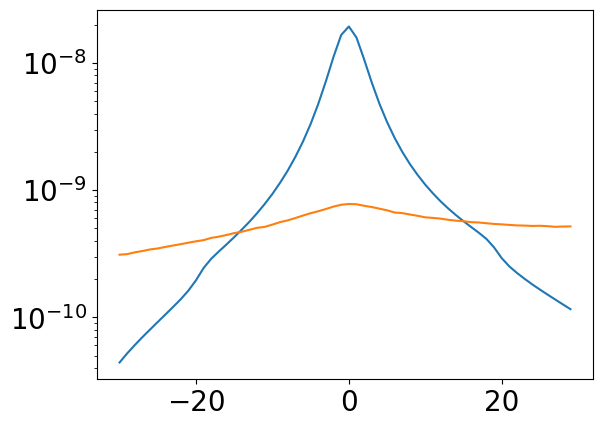

In [14]:
plt.plot(data.omega, data.Is)
plt.plot(data.omega, data.Im)

plt.yscale('log')

#plt.savefig('anular 11, 13')

Text(0, 0.5, '$I_m/(I_s+I_m)$')

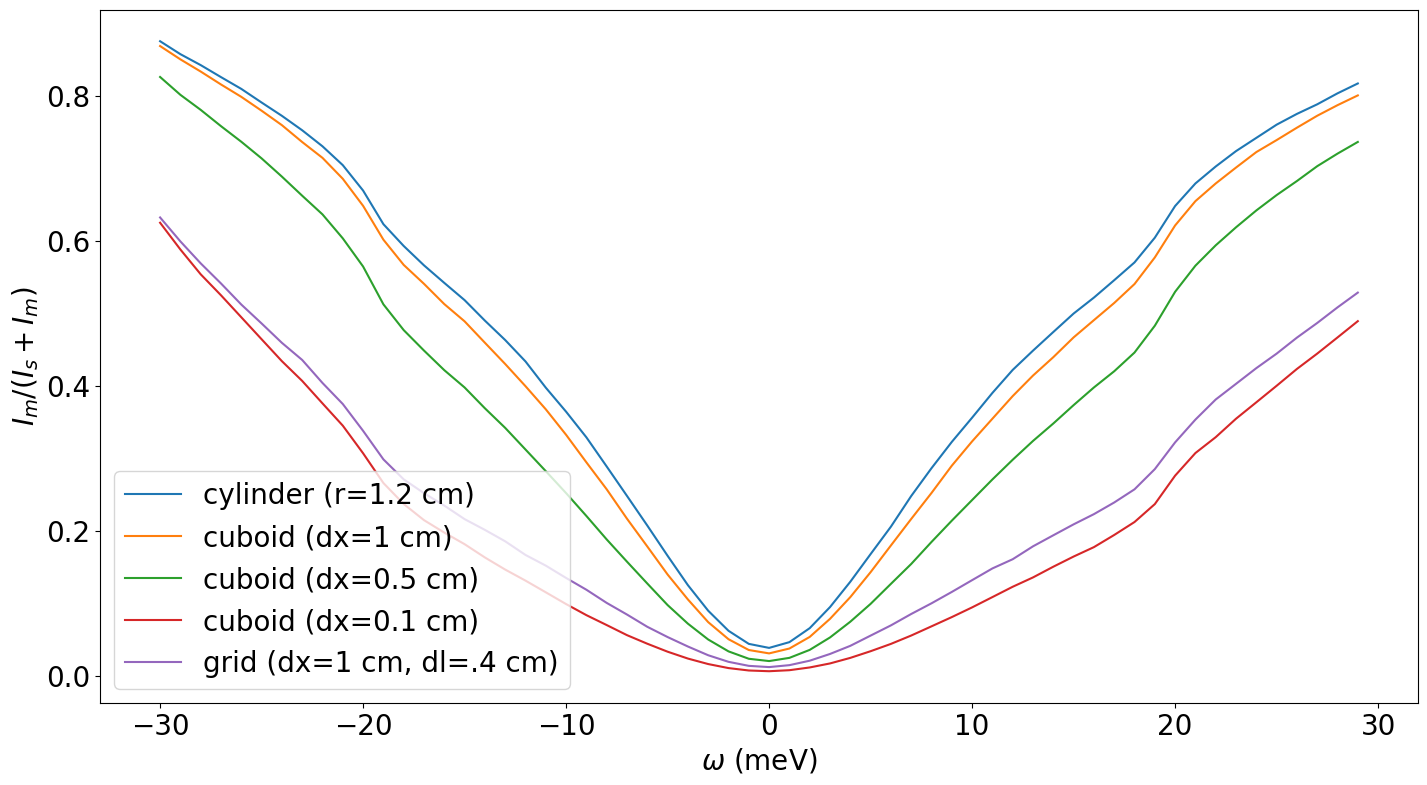

In [28]:
plt.figure(figsize=(17,9))

plt.plot(data.omega, data.Im/(data.Is+data.Im), label = 'cylinder (r=1.2 cm)')
plt.plot(data.omega, data1.Im/(data1.Is+data1.Im), label = 'cuboid (dx=1 cm)')
plt.plot(data.omega, data2.Im/(data2.Is+data2.Im), label = 'cuboid (dx=0.5 cm)')
plt.plot(data.omega, data3.Im/(data3.Is+data3.Im), label = 'cuboid (dx=0.1 cm)')
plt.plot(data.omega, data4.Im/(data4.Is+data4.Im), label = 'grid (dx=1 cm, dl=.4 cm)')

plt.legend(loc='lower left')
#plt.legend(loc='best')

plt.xlabel('$\omega$ (meV)')
plt.ylabel('$I_m/(I_s+I_m)$')

In [16]:
data

,omega,Q,ki,kf,Ei,Ef,theta,Is,Im
0,-30,1.5,4.999978,6.283185,4.999978,81.8,0.138698,4.406545e-11,3.106186e-10
1,-29,1.5,5.048010,6.283185,5.048010,81.8,0.151264,5.197869e-11,3.138207e-10
2,-28,1.5,5.095589,6.283185,5.095589,81.8,0.162117,6.047209e-11,3.242262e-10
3,-27,1.5,5.142727,6.283185,5.142727,81.8,0.171617,6.982786e-11,3.320139e-10
4,-26,1.5,5.189438,6.283185,5.189438,81.8,0.180011,8.014948e-11,3.416205e-10
5,-25,1.5,5.235732,6.283185,5.235732,81.8,0.187475,9.182371e-11,3.479183e-10
6,-24,1.5,5.281620,6.283185,5.281620,81.8,0.194142,1.051198e-10,3.575582e-10
7,-23,1.5,5.327113,6.283185,5.327113,81.8,0.200115,1.204173e-10,3.668405e-10
8,-22,1.5,5.372220,6.283185,5.372220,81.8,0.205477,1.385219e-10,3.759439e-10
9,-21,1.5,5.416952,6.283185,5.416952,81.8,0.210294,1.618124e-10,3.862147e-10


(0.0, 1.0)

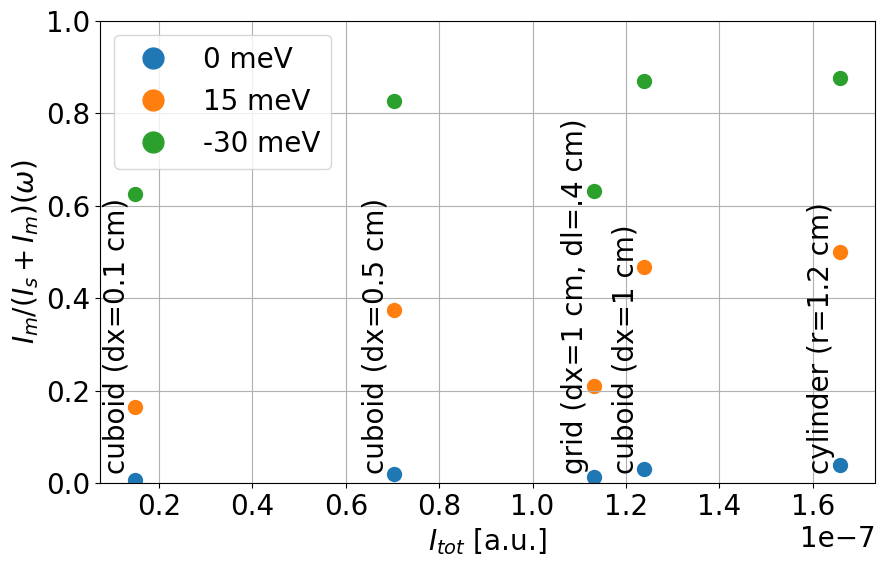

In [17]:
plt.figure(figsize=(10,6))

col = {30:'C0', 45:'C1', 0 :'C2'}
for i in [30,45,0]:
    plt.scatter((data.Is+data.Im).sum(), data.loc[i].Im/(data.loc[i].Is+data.loc[i].Im), label = 'cylinder (r=1.2 cm)', c=col[i], s=100)
    plt.scatter((data1.Is+data1.Im).sum(), data1.loc[i].Im/(data1.loc[i].Is+data1.loc[i].Im), label = 'cuboid (dx=1 cm)', c=col[i], s=100)
    plt.scatter((data2.Is+data2.Im).sum(), data2.loc[i].Im/(data2.loc[i].Is+data2.loc[i].Im), label = 'cuboid (dx=0.5 cm)', c=col[i],   s=100)
    plt.scatter((data3.Is+data3.Im).sum(), data3.loc[i].Im/(data3.loc[i].Is+data3.loc[i].Im), label = 'cuboid (dx=0.1 cm)', c=col[i], s=100)
    plt.scatter((data4.Is+data4.Im).sum(), data4.loc[i].Im/(data4.loc[i].Is+data4.loc[i].Im), label = 'grid (dx=1 cm, dl=.4 cm)', c=col[i], s=100)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='C0', label='0 meV', markersize=15, linestyle='None'),
                     Line2D([0], [0], marker='o', color='C1', label='15 meV', markersize=15, linestyle='None'),
                     Line2D([0], [0], marker='o', color='C2', label='-30 meV', markersize=15, linestyle='None')]
plt.legend(handles=legend_elements, loc='best')

# vertical text
plt.text((data.Is+data.Im).sum()-.7e-8, 0.02, 'cylinder (r=1.2 cm)', rotation=90, verticalalignment='bottom')
plt.text((data1.Is+data1.Im).sum()-.7e-8, 0.02, 'cuboid (dx=1 cm)', rotation=90, verticalalignment='bottom')
plt.text((data2.Is+data2.Im).sum()-.7e-8, 0.02, 'cuboid (dx=0.5 cm)', rotation=90, verticalalignment='bottom')
plt.text((data3.Is+data3.Im).sum()-.7e-8, 0.02, 'cuboid (dx=0.1 cm)', rotation=90, verticalalignment='bottom')
plt.text((data4.Is+data4.Im).sum()-.7e-8, 0.02, 'grid (dx=1 cm, dl=.4 cm)', rotation=90, verticalalignment='bottom')

plt.grid()
plt.xlabel('$I_{tot}$ [a.u.]')
plt.ylabel('$I_m/(I_s+I_m)(\omega)$')
plt.ylim(0,1)

Text(0, 0.5, '$I_s$')

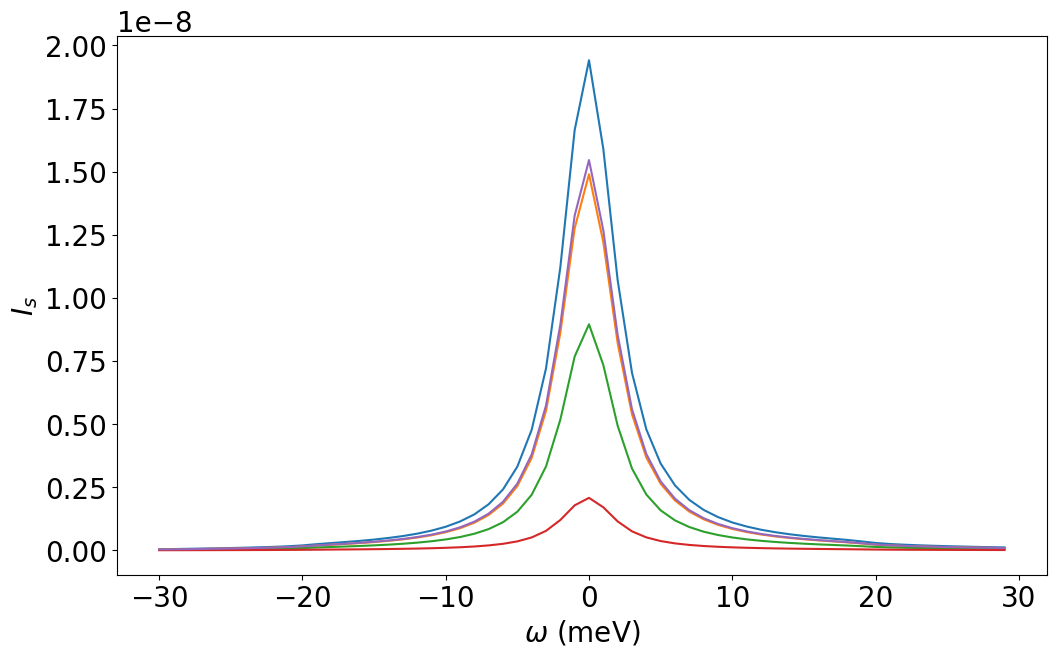

In [26]:
plt.figure(figsize=(12,7))

plt.plot(data.omega, data.Is, label = 'cylinder (r=1.2 cm)')
plt.plot(data.omega, data1.Is, label = 'cuboid (dx=1 cm)')
plt.plot(data.omega, data2.Is, label = 'cuboid (dx=0.5 cm)')
plt.plot(data.omega, data3.Is, label = 'cuboid (dx=0.1 cm)')
plt.plot(data.omega, data4.Is, label = 'grid (dx=1 cm, dl=.4 cm)')

#plt.legend(loc='lower left')
#plt.legend(loc='best')

plt.xlabel('$\omega$ (meV)')
plt.ylabel('$I_s$')

Text(0, 0.5, '$I_m/(I_s+I_m)$')

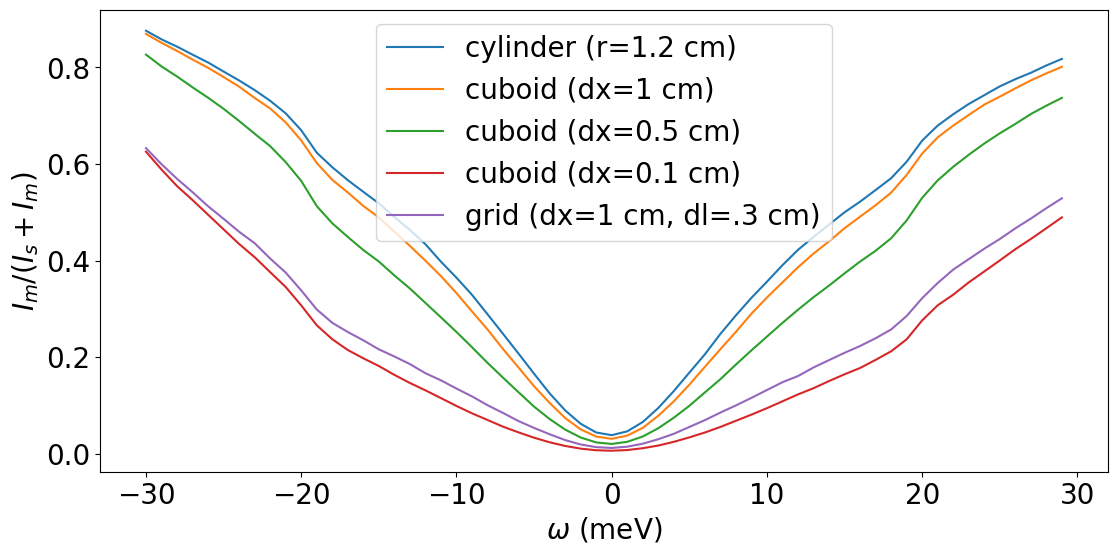

In [19]:
plt.figure(figsize=(13,6))

plt.plot(data.omega, data.Im/(data.Is+data.Im), label = 'cylinder (r=1.2 cm)')
plt.plot(data.omega, data1.Im/(data1.Is+data1.Im), label = 'cuboid (dx=1 cm)')
plt.plot(data.omega, data2.Im/(data2.Is+data2.Im), label = 'cuboid (dx=0.5 cm)')
plt.plot(data.omega, data3.Im/(data3.Is+data3.Im), label = 'cuboid (dx=0.1 cm)')
plt.plot(data.omega, data4.Im/(data4.Is+data4.Im), label = 'grid (dx=1 cm, dl=.3 cm)')

plt.legend(loc='lower left')
plt.legend(loc='best')

plt.xlabel('$\omega$ (meV)')
plt.ylabel('$I_m/(I_s+I_m)$')

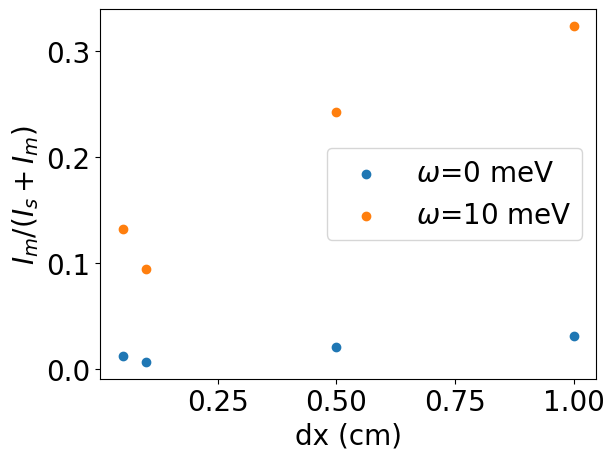

In [20]:
dx = [1, 0.5, 0.1, 0.05]

ratio0 = [
    data1.loc[30].Im/(data1.loc[30].Is+data1.loc[30].Im),
    data2.loc[30].Im/(data2.loc[30].Is+data2.loc[30].Im),
    data3.loc[30].Im/(data3.loc[30].Is+data3.loc[30].Im),
    data4.loc[30].Im/(data4.loc[30].Is+data4.loc[30].Im),
]

ratio1 = [
    data1.loc[40].Im/(data1.loc[40].Is+data1.loc[40].Im),
    data2.loc[40].Im/(data2.loc[40].Is+data2.loc[40].Im),
    data3.loc[40].Im/(data3.loc[40].Is+data3.loc[40].Im),
    data4.loc[40].Im/(data4.loc[40].Is+data4.loc[40].Im),
]

plt.figure()
plt.scatter(dx, ratio0, label='$\omega$=0 meV')
plt.scatter(dx, ratio1, label='$\omega$=10 meV')
plt.xlabel('dx (cm)')
plt.ylabel('$I_m/(I_s+I_m)$')


plt.legend()
#plt.yscale('log')
